<a href="https://colab.research.google.com/github/Aarushi900/EDA/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/data_mining_2/test.csv')
df2=pd.read_csv('/content/drive/MyDrive/data_mining_2/train.csv')

In [ ]:
df1_columns = df1.columns
print("Column names for df1:", df1_columns)

# Get column names for df2
df2_columns = df2.columns
print("Column names for df2:", df2_columns)

Column names for df1: Index(['City', 'Month', 'Year', 'Decibel_Level', 'Traffic_Density',
       'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score',
       'Cost_of_Living_Index', 'Healthcare_Index'],
      dtype='object')
Column names for df2: Index(['City', 'Month', 'Year', 'Decibel_Level', 'Traffic_Density',
       'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score',
       'Cost_of_Living_Index', 'Healthcare_Index'],
      dtype='object')


In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,Auckland,January,2030,55,Low,80,40,8.4,110,97
1,Berlin,January,2030,50,Low,60,45,7.9,80,93
2,Cairo,January,2030,75,Very High,15,110,4.1,55,69
3,Denver,January,2030,60,Medium,40,50,7.5,95,89
4,Edinburgh,January,2030,55,Low,65,55,7.8,85,92


In [ ]:
var_cat=[]
var_num=[]
for c in df.columns:
    if df[c].dtype=='object':
        var_cat.append(c)
    if (df[c].dtype=='int64'or df[c].dtype=='float64'):
         var_num.append(c)

In [ ]:
print("Categorical Variables: ",var_cat)
print("Numerical variables: ",var_num)

Categorical Variables:  ['City', 'Month', 'Traffic_Density']
Numerical variables:  ['Year', 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score', 'Cost_of_Living_Index', 'Healthcare_Index']


In [ ]:
num_discrete=[]
num_continuous=[]
for c in var_num:
    if df[c].dtype=='int64':
        num_discrete.append(c)
    elif df[c].dtype=='float64':
        num_continuous.append(c)

In [ ]:
print("Discrete: ",num_discrete)
print("Continuous: ",num_continuous)

Discrete:  ['Year', 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Cost_of_Living_Index', 'Healthcare_Index']
Continuous:  ['Happiness_Score']


Ordinal: 'Year', 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score', 'Cost_of_Living_Index', 'Healthcare_Index'

Nominal:City,Month,Traffic_Density

In [ ]:
import numpy as np
bin_HS=np.arange(min(df['Happiness_Score']),max(df['Happiness_Score']),30)
print(len(bin_HS))

5


In [ ]:
label_HS=['Low','Medium','Above Medium','High']

In [ ]:
df['Happiness_Score']=pd.cut(df['Happiness_Score'],bins=bin_HS,labels=label_HS)

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
df['Happiness_Score'].value_counts()

Low             100
Above Medium    100
High            100
Medium           99
Name: Happiness_Score, dtype: int64

In [ ]:
num_df=df[var_num]
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 544
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  596 non-null    int64
 1   Decibel_Level         596 non-null    int64
 2   Green_Space_Area      596 non-null    int64
 3   Air_Quality_Index     596 non-null    int64
 4   Cost_of_Living_Index  596 non-null    int64
 5   Healthcare_Index      596 non-null    int64
dtypes: int64(6)
memory usage: 32.6 KB


In [ ]:
num_df.cov()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Cost_of_Living_Index,Healthcare_Index
Year,3.699112,-1.391278,802.748336,-11.321273,1.207955,3.634276
Decibel_Level,-1.391278,51.865307,-2289.699890,233.775168,62.546035,-68.286659
Green_Space_Area,802.748336,-2289.699890,608518.757755,-12667.068270,-11851.844157,4098.763113
Air_Quality_Index,-11.321273,233.775168,-12667.068270,1413.292256,305.912103,-390.726440
Cost_of_Living_Index,1.207955,62.546035,-11851.844157,305.912103,678.276676,-102.780258
Healthcare_Index,3.634276,-68.286659,4098.763113,-390.726440,-102.780258,122.761477


In [ ]:
num_df.corr()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Cost_of_Living_Index,Healthcare_Index
Year,1.000000,-0.100445,0.535049,-0.156578,0.024116,0.170545
Decibel_Level,-0.100445,1.000000,-0.407571,0.863463,0.333471,-0.855788
Green_Space_Area,0.535049,-0.407571,1.000000,-0.431940,-0.583372,0.474225
Air_Quality_Index,-0.156578,0.863463,-0.431940,1.000000,0.312448,-0.938050
Cost_of_Living_Index,0.024116,0.333471,-0.583372,0.312448,1.000000,-0.356185
Healthcare_Index,0.170545,-0.855788,0.474225,-0.938050,-0.356185,1.000000


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def histo(col_name):
  df.hist(column=col_name)
  plt.title(f'Histogram of {col_name}')
  plt.show()

In [ ]:
def density_plot(col_name):
  df[f'{col_name}'].plot.density()
  plt.title(f'Density Plot of {col_name}')
  plt.show()

<ipython-input-36-6c7eb63790f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm=sb.heatmap(df.corr())


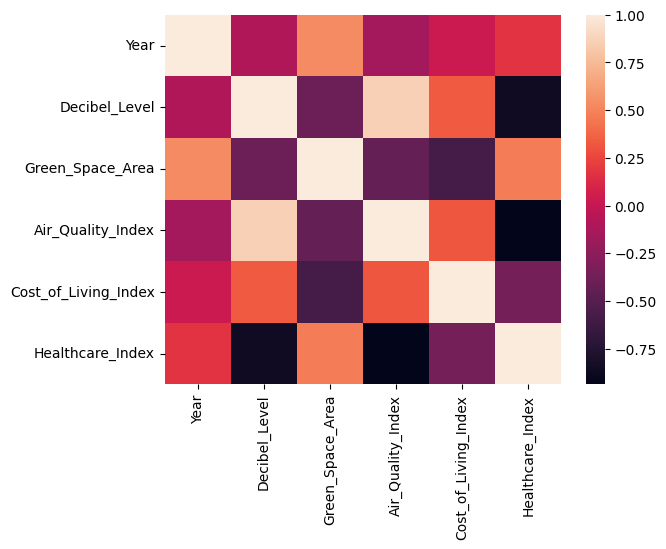

In [ ]:
import seaborn as sb
hm=sb.heatmap(df.corr())
plt.show()

In [ ]:
def box_plot(col_name):
  df.boxplot(f'{col_name}')

In [ ]:
def scatter_plot(col_name):
  df.scatterplot(f'col_name')

In [ ]:
def line_plot(col_name):
  df.plot.line(f'{col_name}')

In [ ]:
def quar_plot(col_name):
  quantiles = df[f'{col_name}'].quantile([0.25, 0.5, 0.75])

# Plot quantiles and data points
  plt.plot(quantiles, quantiles, 'b-', label='Quantiles')
  plt.scatter(df[f'{col_name}'], df[f'{col_name}'], c='gray', alpha=0.5, label='Data points')
  plt.xlabel('Data values')
  plt.ylabel('Quantile values')
  plt.legend()
  plt.show()

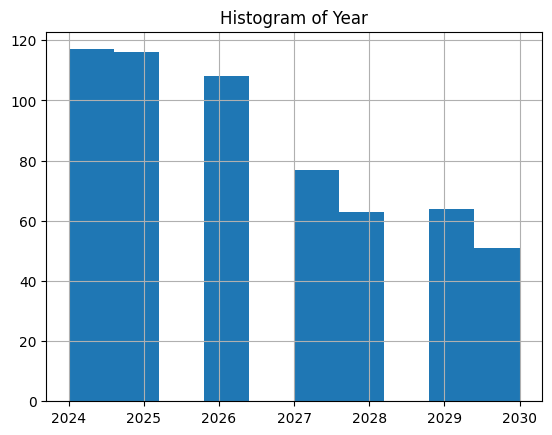

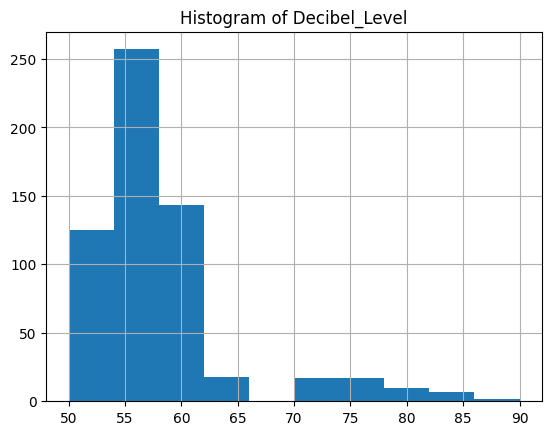

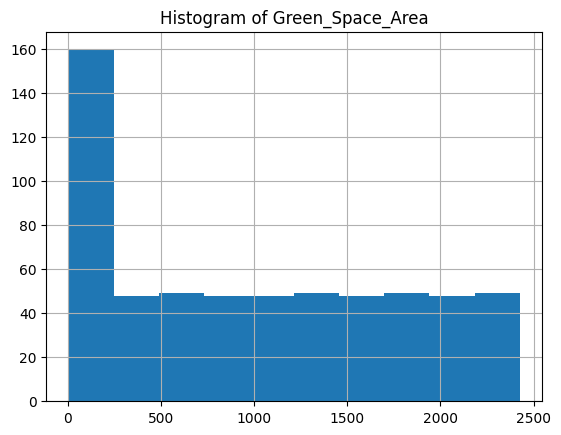

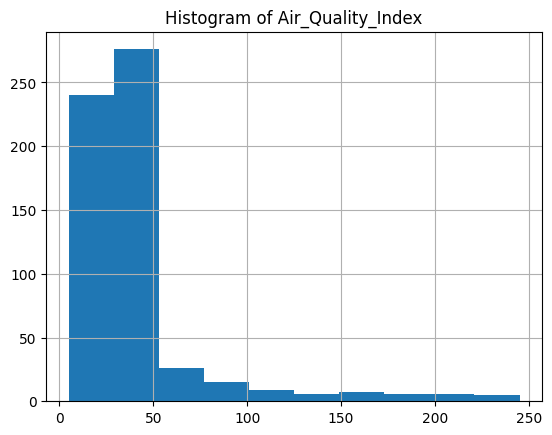

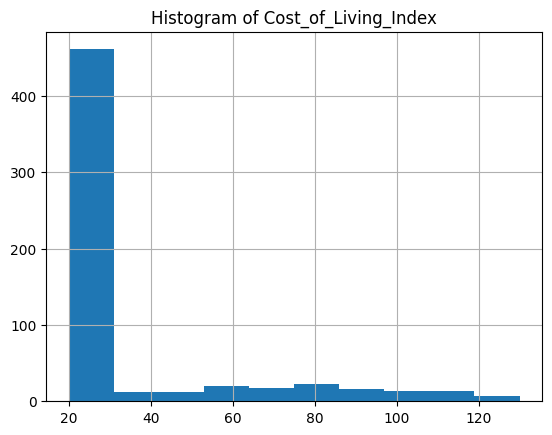

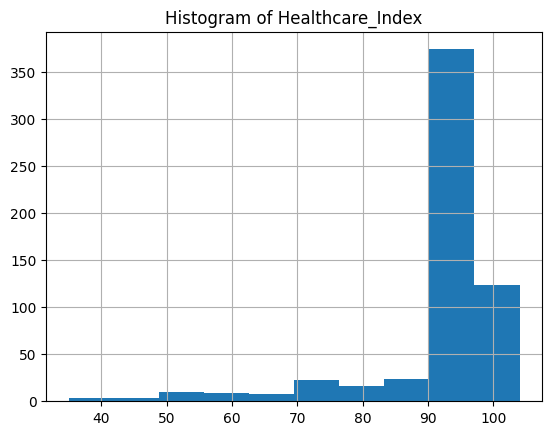

In [ ]:
df_columns = var_num
for i in df_columns:
  histo(i)

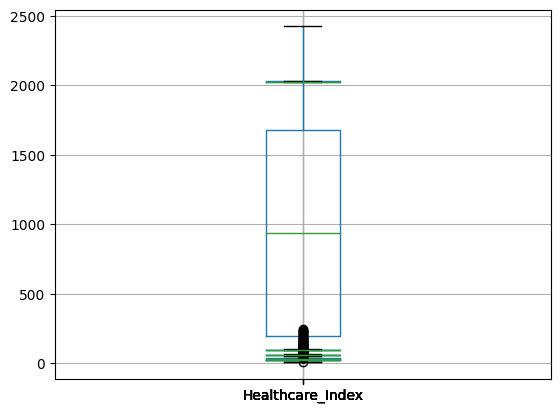

In [ ]:

for i in df_columns:
  box_plot(i)

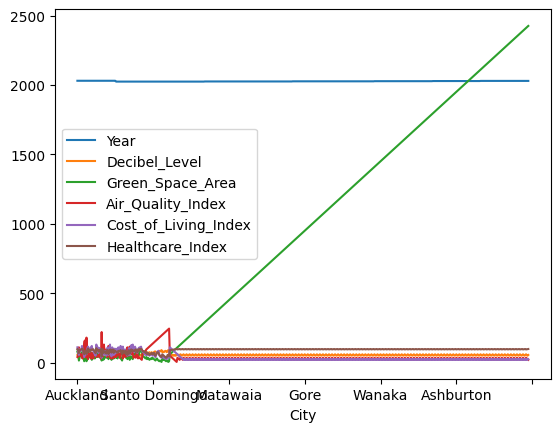

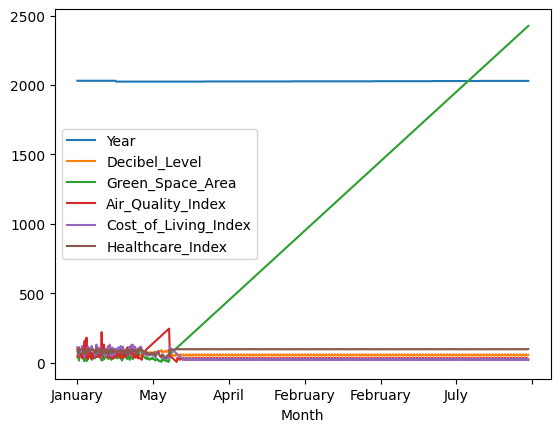

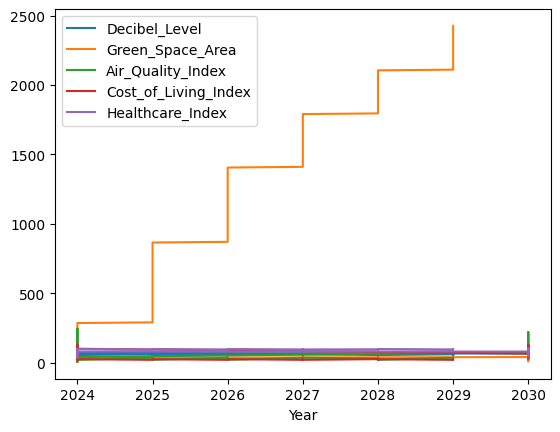

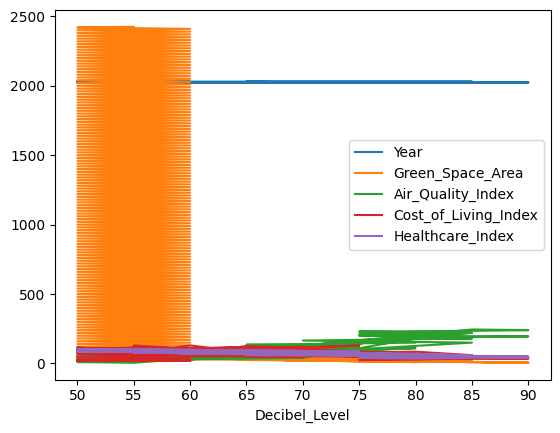

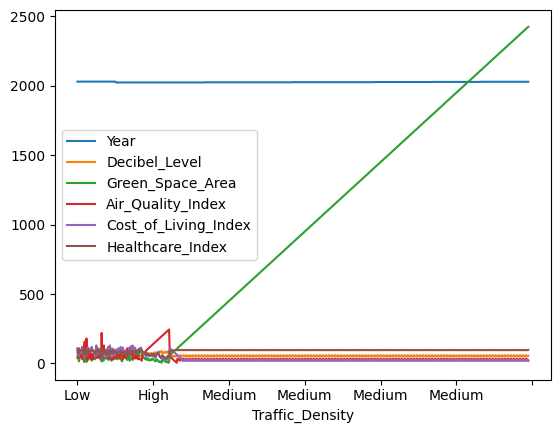

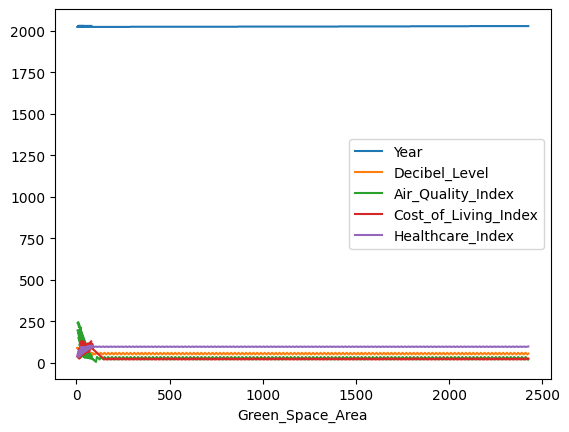

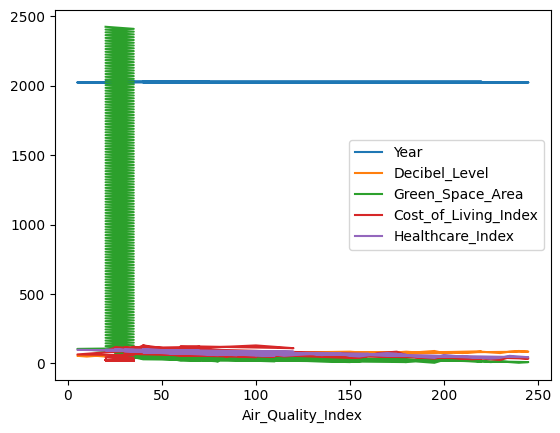

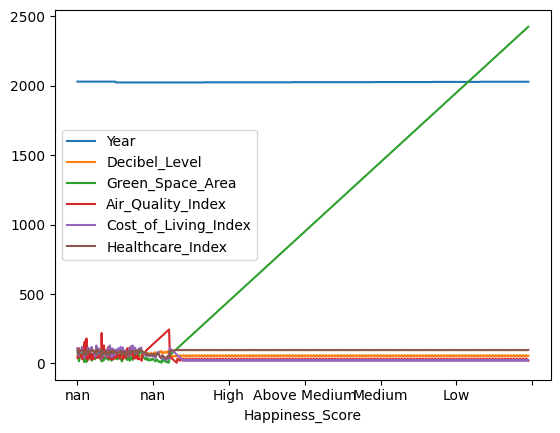

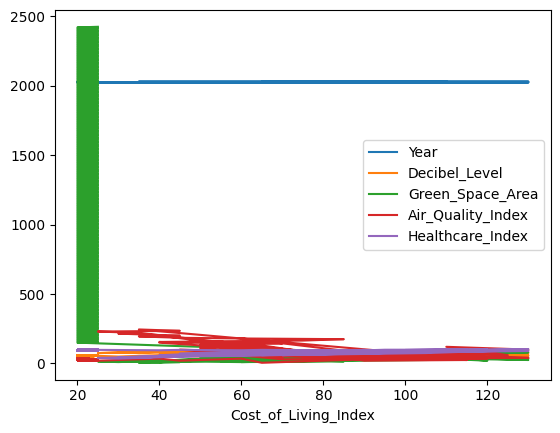

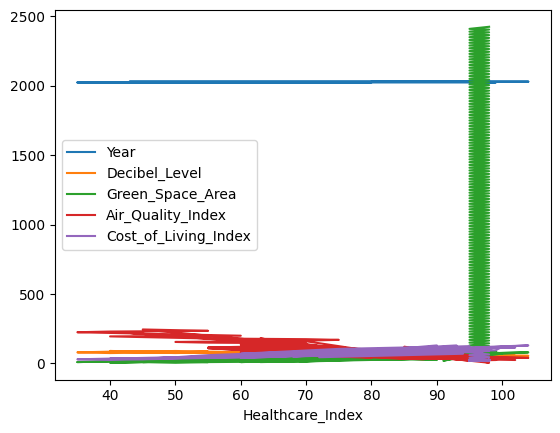

In [ ]:
df_columns = df.columns
for i in df_columns:
  line_plot(i)

In [ ]:
df_columns = var_num
for i in df_columns:
  scatter_plot(i)

AttributeError: 'DataFrame' object has no attribute 'scatterplot'

In [ ]:
df_columns = df.columns
for i in df_columns:
  density_plot(i)

In [ ]:
df_columns = df.columns
for i in df_columns:
  quar_plot(i)

In [ ]:
df.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,2026.417785,57.340604,996.484899,40.486577,-40.434228,35.025168,92.283557
std,1.923307,7.201757,780.076123,37.593779,43.064520,26.043745,11.079778
min,2024.000000,50.000000,5.000000,5.000000,-122.900000,20.000000,35.000000
25%,2025.000000,55.000000,193.750000,25.000000,-78.275000,20.000000,95.000000
50%,2026.000000,55.000000,937.500000,30.000000,-33.650000,25.000000,96.000000
75%,2028.000000,60.000000,1681.250000,35.000000,4.200000,25.000000,97.000000
max,2030.000000,90.000000,2425.000000,245.000000,8.700000,130.000000,104.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  596 non-null    object 
 1   Month                 596 non-null    object 
 2   Year                  596 non-null    int64  
 3   Decibel_Level         596 non-null    int64  
 4   Traffic_Density       596 non-null    object 
 5   Green_Space_Area      596 non-null    int64  
 6   Air_Quality_Index     596 non-null    int64  
 7   Happiness_Score       596 non-null    float64
 8   Cost_of_Living_Index  596 non-null    int64  
 9   Healthcare_Index      596 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 51.2+ KB
